![pandas](https://www.hanbit.co.kr/data/books/B6417848794_l.jpg)

https://wikidocs.net/32829

### 0. 판다스 시작하기

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. pandas 데이터 구조 소개

#### Series

In [43]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [44]:
# obj.values
obj.index  #  range(4) 랑 같다. range가 들어가 있었구나!

RangeIndex(start=0, stop=4, step=1)

In [45]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2
# obj2.index 를 유심히 보라. 1. 문자열도 들어갈 수가 있다. 2. 리스트로 되어 있다.


d    4
b    7
a   -5
c    3
dtype: int64

In [46]:
obj2[['c', 'a', 'd', 'd']] # 리스트가 인덱스 선택에 활용됐음을 확인해라

c    3
a   -5
d    4
d    4
dtype: int64

#### DataFrame

In [47]:
# 같은 길이의 리스트로 만들어진 딕셔너리를 이용하면 Series와 DataFrame을 생성할 수 있다.
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [48]:
frame.tail(3)

,state,year,pop
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [49]:
# 만약 원하는 순서대로 columns를 지정하고 싶다면 columns를 지정해주면 된다.
pd.DataFrame(data, columns=['Year', 'state', 'pop'])

,Year,state,pop
0,NaN,Ohio,1.5
1,NaN,Ohio,1.7
2,NaN,Ohio,3.6
3,NaN,Nevada,2.4
4,NaN,Nevada,2.9
5,NaN,Nevada,3.2


In [50]:
# index 값을 숫자로만 넣을 수 있다는 편견을 버리자.
# 없는 Key 값이 있으면 새로 만들고 값이 없으면 NaN으로 채운다.

frame2 = pd.DataFrame(data, columns=['Year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,Year,state,pop,debt
one,NaN,Ohio,1.5,NaN
two,NaN,Ohio,1.7,NaN
three,NaN,Ohio,3.6,NaN
four,NaN,Nevada,2.4,NaN
five,NaN,Nevada,2.9,NaN
six,NaN,Nevada,3.2,NaN


In [51]:
frame2.columns

Index(['Year', 'state', 'pop', 'debt'], dtype='object')

In [52]:
#frame2['state']
frame2.Year  # 주석 없애고 이 코드도 실행시켜 보자.

one      NaN
two      NaN
three    NaN
four     NaN
five     NaN
six      NaN
Name: Year, dtype: object

In [53]:
# loc 의 사용 방법을 주목해라. 메소드를 사용하는 것이 아니라 속성처럼 사용한다.
# loc 는 index를 기준으로 값을 찾는다. 그래서 index가 없으면 에러가 난다.
frame2.loc['three']


Year      NaN
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [54]:
# 냅다 값을 넣으면 해당 컬럼에 모든 값이 그 값으로 채워진다.
frame2['debt'] = 16.5
frame2

,Year,state,pop,debt
one,NaN,Ohio,1.5,16.5
two,NaN,Ohio,1.7,16.5
three,NaN,Ohio,3.6,16.5
four,NaN,Nevada,2.4,16.5
five,NaN,Nevada,2.9,16.5
six,NaN,Nevada,3.2,16.5


In [55]:
# 리스트나 배열을 넣으면 전체에 대입한다. 
frame2['debt'] = np.arange(6.)
frame2

,Year,state,pop,debt
one,NaN,Ohio,1.5,0.0
two,NaN,Ohio,1.7,1.0
three,NaN,Ohio,3.6,2.0
four,NaN,Nevada,2.4,3.0
five,NaN,Nevada,2.9,4.0
six,NaN,Nevada,3.2,5.0


In [56]:
# Series를 넣으면 index에 맞춰서 대입한다. 없는 index는 NaN으로 채운다.
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,Year,state,pop,debt
one,NaN,Ohio,1.5,NaN
two,NaN,Ohio,1.7,-1.2
three,NaN,Ohio,3.6,NaN
four,NaN,Nevada,2.4,-1.5
five,NaN,Nevada,2.9,-1.7
six,NaN,Nevada,3.2,NaN


In [57]:
# 조건 연산을 통해서 값을 집어 넣는 경우
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,Year,state,pop,debt,eastern
one,NaN,Ohio,1.5,NaN,True
two,NaN,Ohio,1.7,-1.2,True
three,NaN,Ohio,3.6,NaN,True
four,NaN,Nevada,2.4,-1.5,False
five,NaN,Nevada,2.9,-1.7,False
six,NaN,Nevada,3.2,NaN,False


In [58]:
del frame2['eastern']
frame2.columns

Index(['Year', 'state', 'pop', 'debt'], dtype='object')

In [59]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [60]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [61]:
# transpose 로 행과 열을 바꿀 수 있다.
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [62]:
# index가 없는 값으로 만들면, NaN으로 채워진다. 
# 데이터에 다른 길이를 추가 했을 때와는 다른 상황이다.
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [63]:
# 리스트 슬라이싱 하듯이 
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [64]:
# index와 columns에 이름을 붙일 수 있다.

frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [65]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [66]:
frame2.values

array([[nan, 'Ohio', 1.5, nan],
       [nan, 'Ohio', 1.7, -1.2],
       [nan, 'Ohio', 3.6, nan],
       [nan, 'Nevada', 2.4, -1.5],
       [nan, 'Nevada', 2.9, -1.7],
       [nan, 'Nevada', 3.2, nan]], dtype=object)

#### 인덱스(Index)

In [67]:
# 사실 index도 객체이다.
obj = pd.Series(range(3), index=['a', 'b', 'c'])
idx = obj.index
idx

# index 이름을 중복해서 쓸 수 있을까?

Index(['a', 'b', 'c'], dtype='object')

In [68]:
idx[1:]

Index(['b', 'c'], dtype='object')

In [69]:
# idx[1] = 'd' 
# TypeError 발생. 에러 메시지에 주목하자.

obj.reindex(['a','d','c']) # 값도 바뀜을 주의

a    0.0
d    NaN
c    2.0
dtype: float64

In [70]:
# pd.Index를 이용하면 바로 index를 만들 수 있다.
labels = pd.Index(np.arange(3))
# labels = pd.Index(list(range(3)))
labels

Index([0, 1, 2], dtype='int32')

In [71]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [72]:
obj2.index is labels

True

### 2. 필수 기능들

In [73]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame


,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [74]:
# index는 mutable 하지 않았기 때문에, reindex 메소드를 사용해 줘야 한다.
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [75]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states) # 사실 columns과 index는 같은 건데, 위치에 따라 이름만 다르다.

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [76]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [77]:
# drop은 index를 기준으로 값을 지운다.
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [106]:
# column을 지우는 경우에는 axis=1을 넣어준다. 또는 columns를 넣어준다.
data.drop('two', axis=1)
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [79]:
# inplace=True를 넣어주면 원본이 바뀐다. 다시 할당 말자!!
data.drop('three',axis=1,inplace=True)
data

,one,two,four
Ohio,0,1,3
Colorado,4,5,7
Utah,8,9,11
New York,12,13,15


In [80]:
obj.drop('c', inplace=True)
obj

a    0
b    1
dtype: int64

#### 선택, 필터링

In [81]:
obj = pd.Series(np.arange(4.), index=['a', 'c', 'b', 'd'])
obj

a    0.0
c    1.0
b    2.0
d    3.0
dtype: float64

In [82]:
# index를 기준으로 정렬한다. 
obj['a':'b']

a    0.0
c    1.0
b    2.0
dtype: float64

In [83]:
obj['a':'d'] = 5 
obj
# obj = pd.Series(np.arange(4.), index=['a', 'c', 'b', 'd'])

a    5.0
c    5.0
b    5.0
d    5.0
dtype: float64

In [84]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [85]:
# column을 기준으로 선택할 때 리스트로 전달해줌 주의. (index는 겹괄호를 안해줬다. 데이터프레임이라 이렇다.)
data[['two', 'one']]

,two,one
Ohio,1,0
Colorado,5,4
Utah,9,8
New York,13,12


In [109]:
# row 기준으로 하는 조건 선택
list(data[data['two'] > 5]['two'].values)

[9, 13]

In [87]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


#### 산술 연산과 데이터 정렬

In [88]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [89]:
# index가 같은 것끼리 연산을 수행한다. 
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [90]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
print(df1)
print(df2)

            b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0


In [91]:
df1 + df2 # 1. index를 맞춰서 연산을 진행했다. 2. 정렬은 알파벳 순으로 다시 했다.

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### Apply, Map

In [92]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,1.865059,-1.485839,0.535728
Ohio,1.274460,-2.063181,-0.544897
Texas,0.774264,0.700579,-0.440752
Oregon,2.591333,-1.722986,0.987055


<Axes: xlabel='SECRETARY2'>

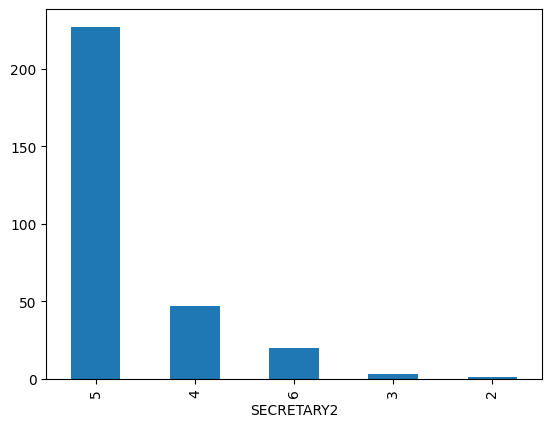

In [116]:
senators = pd.read_csv("senators.csv")
#senators['SECRETARY2'].apply(lambda x : x.split(", ") )
senators['SECRETARY2'].apply(lambda x : len(x.split(", ")) ).value_counts().plot(kind='bar')

In [93]:
# 드디어 나왔다. apply. 
# axis를 지정해주지 않으면 index를 기준으로 판단한다. 
# column이 같으면서 index가 다른 것들의 max, min 값. 즉, 열방향
frame.apply(lambda x: x.max() - x.min())

b    1.817069
d    2.763761
e    1.531952
dtype: float64

In [118]:
# index가 같으면서 column이 다른 것들의 max, min 값. 즉, 행방향
def f(x):
    return x.max() - x.min()
frame.apply(f, axis='columns')

0    4
1    6
2    3
3    1
dtype: int64

In [95]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,0.774264,-2.063181,-0.544897
max,2.591333,0.700579,0.987055


#### 정렬과 랭킹 매기기

In [96]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [121]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [99]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame


,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [100]:
# 2개도 된다.
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


#### 유니크, 빈도 세기

In [101]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [102]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [103]:
obj.value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [104]:
pd.value_counts(obj.values, sort=False)

C:\Users\r2com\AppData\Local\Temp\ipykernel_15732\3084372382.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(obj.values, sort=False)


c    3
a    3
d    1
b    2
Name: count, dtype: int64